In [4]:
%pip install -Uqq fastai gradio

Note: you may need to restart the kernel to use updated packages.


In [5]:
from fastai.vision.all import *
from pathlib import Path
import gradio as gr

def is_chicken(x): return x[0].isupper()

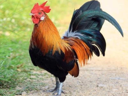

In [6]:
img = PILImage.create('chicken.jpeg')

img.thumbnail((128,128))
img

In [7]:
learn = load_learner('model.pkl')

In [8]:
learn.predict(img)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


('chicken', tensor(0), tensor([0.7455, 0.2545]))

In [9]:
learn.export('model.pkl')

In [10]:
# Define a function for model inference
def classify_image(inp):
    img = PILImage.create(inp)
    img.thumbnail((128,128))
    pred,pred_idx,probs = learn.predict(img)
    if pred == "duck":
        result = f"The image is a duck with probability {probs[pred_idx]:.4f}"
    else:
        result = f"The image is look like a chicken {probs[pred_idx]:.4f}"
    return result

In [11]:
image = gr.Image()
label = gr.Label()
examples = ["chicken.jpeg", "duck.jpeg", "03Chicken.jpeg"]

In [12]:
# Launch a gradio interface
gr.Interface(fn=classify_image, inputs="image", outputs="text", examples=examples).launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
